# Introduction to classification

In these four lessons, you will explore a fundamental focus of classic machine learning - _classification_. We will walk through using various classification algorithms with a dataset about all the brilliant cuisines of Asia and India. Hope you're hungry!

![just a pinch!](images/pinch.png)

> Celebrate pan-Asian cuisines in these lessons! Image by [Jen Looper](https://twitter.com/jenlooper)

Classification is a form of [supervised learning](https://wikipedia.org/wiki/Supervised_learning) that bears a lot in common with regression techniques. If machine learning is all about predicting values or names to things by using datasets, then classification generally falls into two groups: _binary classification_ and _multiclass classification_.

[![Introduction to classification](https://img.youtube.com/vi/eg8DJYwdMyg/0.jpg)](https://youtu.be/eg8DJYwdMyg "Introduction to classification")

> 🎥 Click the image above for a video: MIT's John Guttag introduces classification

Remember:

- **Linear regression** helped you predict relationships between variables and make accurate predictions on where a new datapoint would fall in relationship to that line. So, you could predict _what price a pumpkin would be in September vs. December_, for example.
- **Logistic regression** helped you discover "binary categories": at this price point, _is this pumpkin orange or not-orange_?

Classification uses various algorithms to determine other ways of determining a data point's label or class. Let's work with this cuisine data to see whether, by observing a group of ingredients, we can determine its cuisine of origin.

### Introduction

Classification is one of the fundamental activities of the machine learning researcher and data scientist. From basic classification of a binary value ("is this email spam or not?"), to complex image classification and segmentation using computer vision, it's always useful to be able to sort data into classes and ask questions of it.

To state the process in a more scientific way, your classification method creates a predictive model that enables you to map the relationship between input variables to output variables.

![binary vs. multiclass classification](images/binary-multiclass.png)

> Binary vs. multiclass problems for classification algorithms to handle. Infographic by [Jen Looper](https://twitter.com/jenlooper)

Before starting the process of cleaning our data, visualizing it, and prepping it for our ML tasks, let's learn a bit about the various ways machine learning can be leveraged to classify data.

Derived from [statistics](https://wikipedia.org/wiki/Statistical_classification), classification using classic machine learning uses features, such as `smoker`, `weight`, and `age` to determine _likelihood of developing X disease_. As a supervised learning technique similar to the regression exercises you performed earlier, your data is labeled and the ML algorithms use those labels to classify and predict classes (or 'features') of a dataset and assign them to a group or outcome.

✅ Take a moment to imagine a dataset about cuisines. What would a multiclass model be able to answer? What would a binary model be able to answer? What if you wanted to determine whether a given cuisine was likely to use fenugreek? What if you wanted to see if, given a present of a grocery bag full of star anise, artichokes, cauliflower, and horseradish, you could create a typical Indian dish?

[![Crazy mystery baskets](https://img.youtube.com/vi/GuTeDbaNoEU/0.jpg)](https://youtu.be/GuTeDbaNoEU "Crazy mystery baskets")

> 🎥 Click the image above for a video.The whole premise of the show 'Chopped' is the 'mystery basket' where chefs have to make some dish out of a random choice of ingredients. Surely a ML model would have helped!

## Hello 'classifier'

The question we want to ask of this cuisine dataset is actually a **multiclass question**, as we have several potential national cuisines to work with. Given a batch of ingredients, which of these many classes will the data fit?

Scikit-learn offers several different algorithms to use to classify data, depending on the kind of problem you want to solve. In the next two lessons, you'll learn about several of these algorithms.

## Exercise - clean and balance your data

The first task at hand, before starting this project, is to clean and **balance** your data to get better results. Start with the blank _notebook.ipynb_ file in the root of this folder.

The first thing to install is [imblearn](https://imbalanced-learn.org/stable/). This is a Scikit-learn package that will allow you to better balance the data (you will learn more about this task in a minute).

1. To install imblearn, run pip install, like so:

In [1]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


2. Import the packages you need to import your data and visualize it, also import SMOTE from imblearn.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from imblearn.over_sampling import SMOTE

Now you are set up to read import the data next.

3. The next task will be to import the data:

In [3]:
df  = pd.read_csv('../../data/cuisines.csv')

Using read_csv() will read the content of the csv file cusines.csv and place it in the variable df.

4. Check the data's shape:

In [4]:
df.shape

(2448, 385)

The first five rows look like this:

In [5]:
df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


## Exercise - learning about cuisines

Now the work starts to become more interesting. Let's discover the distribution of data, per cuisine

1. Plot the data as bars by calling barh():

<Axes: ylabel='cuisine'>

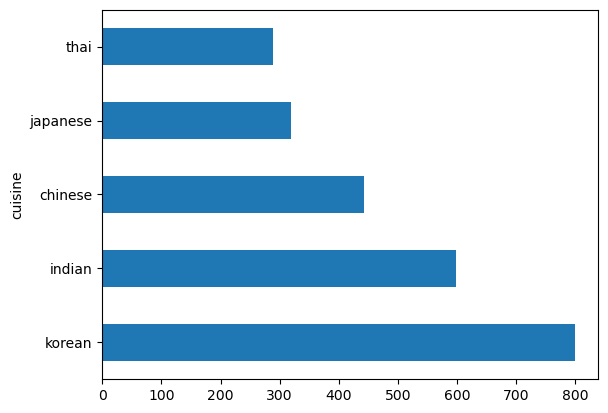

In [7]:
df.cuisine.value_counts().plot.barh()

There are a finite number of cuisines, but the distribution of data is uneven. You can fix that! Before doing so, explore a little more.

2. Find out how much data is available per cuisine and print it out:

In [8]:
thai_df = df[(df.cuisine == "thai")]
japanese_df = df[(df.cuisine == "japanese")]
chinese_df = df[(df.cuisine == "chinese")]
indian_df = df[(df.cuisine == "indian")]
korean_df = df[(df.cuisine == "korean")]

print(f'thai df: {thai_df.shape}')
print(f'japanese df: {japanese_df.shape}')
print(f'chinese df: {chinese_df.shape}')
print(f'indian df: {indian_df.shape}')
print(f'korean df: {korean_df.shape}')

thai df: (289, 385)
japanese df: (320, 385)
chinese df: (442, 385)
indian df: (598, 385)
korean df: (799, 385)


## Discovering ingredients

Now you can dig deeper into the data and learn what are the typical ingredients per cuisine. You should clean out recurrent data that creates confusion between cuisines, so let's learn about this problem.

1. Create a function create_ingredient() in Python to create an ingredient dataframe. This function will start by dropping an unhelpful column and sort through ingredients by their count:

In [9]:
def create_ingredient_df(df):
    ingredient_df = df.T.drop(['cuisine','Unnamed: 0']).sum(axis=1).to_frame('value')
    ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
    ingredient_df = ingredient_df.sort_values(by='value', ascending=False,
    inplace=False)
    return ingredient_df

Now you can use that function to get an idea of top ten most popular ingredients by cuisine.

2. Call create_ingredient() and plot it calling barh():

<Axes: >

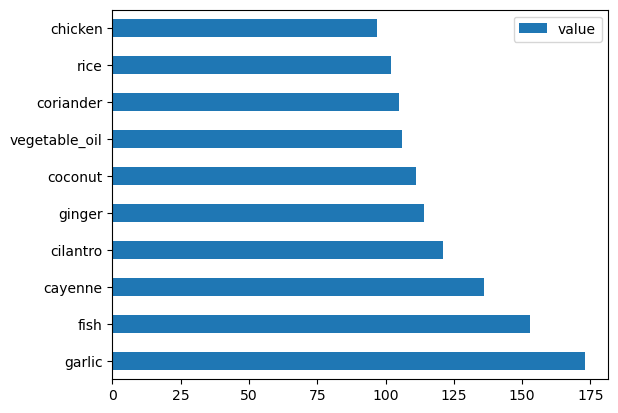

In [10]:
thai_ingredient_df = create_ingredient_df(thai_df)
thai_ingredient_df.head(10).plot.barh()

3. Do the same for the japanese data:

<Axes: >

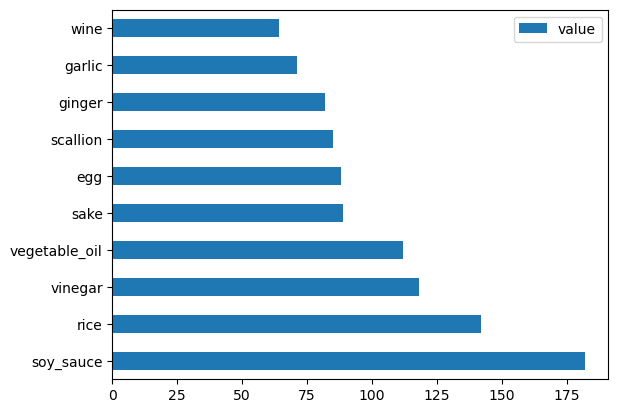

In [11]:
japanese_ingredient_df = create_ingredient_df(japanese_df)
japanese_ingredient_df.head(10).plot.barh()

4. Now for the chinese ingredients:

<Axes: >

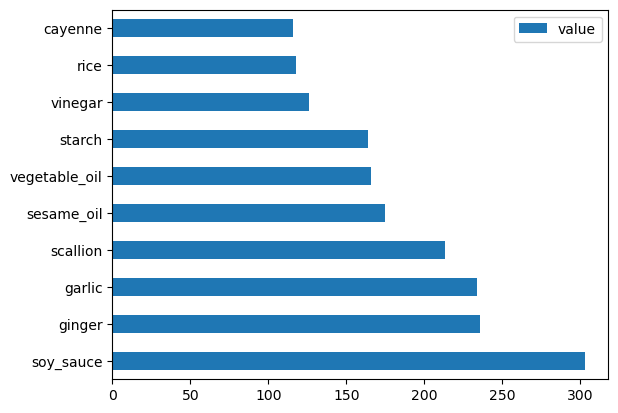

In [12]:
chinese_ingredient_df = create_ingredient_df(chinese_df)
chinese_ingredient_df.head(10).plot.barh()

5. Plot the indian ingredients:

<Axes: >

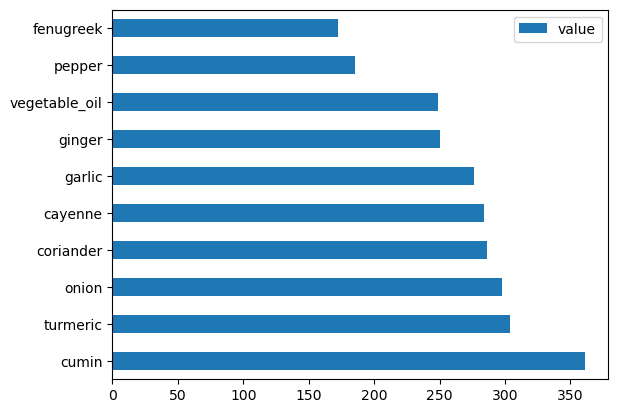

In [13]:
indian_ingredient_df = create_ingredient_df(indian_df)
indian_ingredient_df.head(10).plot.barh()

6. Finally, plot the korean ingredients:

<Axes: >

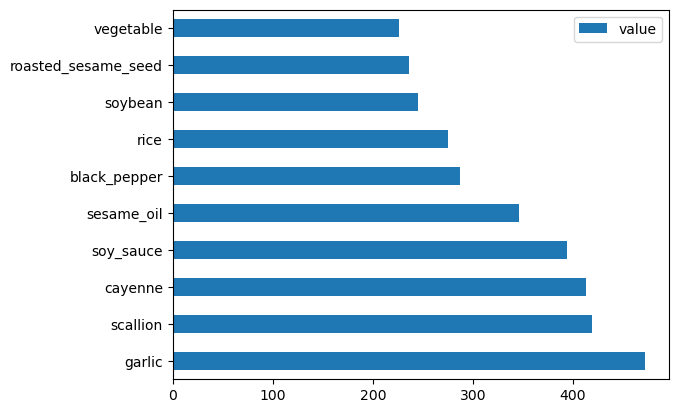

In [14]:
korean_ingredient_df = create_ingredient_df(korean_df)
korean_ingredient_df.head(10).plot.barh()

7. Now, drop the most common ingredients that create confusion between distinct cuisines, by calling drop():

Everyone loves rice, garlic and ginger!

In [15]:
feature_df= df.drop(['cuisine','Unnamed: 0','rice','garlic','ginger'], axis=1)
labels_df = df.cuisine #.unique()
feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Balance the dataset
Now that you have cleaned the data, use SMOTE - "Synthetic Minority Over-sampling Technique" - to balance it.

1. Call fit_resample(), this strategy generates new samples by interpolation.

In [17]:
oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, labels_df)

By balancing your data, you'll have better results when classifying it. Think about a binary classification. If most of your data is one class, a ML model is going to predict that class more frequently, just because there is more data for it. Balancing the data takes any skewed data and helps remove this imbalance.

2. Now you can check the numbers of labels per ingredient:

In [18]:
print(f'new label count: {transformed_label_df.value_counts()}')
print(f'old label count: {df.cuisine.value_counts()}')

new label count: cuisine
indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: count, dtype: int64
old label count: cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64


The data is nice and clean, balanced, and very delicious!

3. The last step is to save your balanced data, including labels and features, into a new dataframe that can be exported into a file:

In [19]:
transformed_df = pd.concat([transformed_label_df,transformed_feature_df],axis=1, join='outer')

4. You can take one more look at the data using transformed_df.head() and transformed_df.info(). Save a copy of this data for use in future lessons:

In [20]:
transformed_df.head()
transformed_df.info()
transformed_df.to_csv("../../data/cleaned_cuisines.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Columns: 381 entries, cuisine to zucchini
dtypes: int64(380), object(1)
memory usage: 11.6+ MB


This fresh CSV can now be found in the root data folder.